<a href="https://colab.research.google.com/github/darioromero/17_Classification/blob/master/90_MarkovChainsRegime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="background-color:#000;"><img src="https://github.com/pyquantnews/PyQuantNewsletter/blob/main/pqn.png?raw=1"></img></div>

This code uses Hidden Markov Models (HMM) to identify regimes in financial time series data. It downloads historical price data, calculates returns and ranges, and uses them as features for the HMM. The model is fitted with the features to identify different market states. The identified states are then plotted to visualize market regime changes. This is useful for understanding and predicting market behavior.

In [2]:
!pip install yfinance
!pip install hmmlearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.9/165.9 kB 3.4 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import yfinance as yf
from hmmlearn import hmm

Download historical price data for SPY from Yahoo Finance

In [4]:
data = yf.download("SPY")

[*********************100%***********************]  1 of 1 completed


Calculate log returns of the closing prices

In [5]:
data

Price,Close,High,Low,Open,Volume
Ticker,SPY,SPY,SPY,SPY,SPY
Date,,,,,
1993-01-29,24.526073,24.543517,24.421410,24.543517,1003200
1993-02-01,24.700516,24.700516,24.543521,24.543521,480500
1993-02-02,24.752842,24.770286,24.630735,24.683066,201300
1993-02-03,25.014494,25.031938,24.770280,24.787724,529400
1993-02-04,25.119144,25.171476,24.822599,25.101701,531500
...,...,...,...,...,...
2025-01-30,605.039978,606.599976,600.719971,603.960022,39281300
2025-01-31,601.820007,609.960022,601.049988,607.500000,66671500


In [6]:
returns = np.log(data.Close / data.Close.shift(1))

Calculate the range as the difference between high and low prices

In [7]:
range = (data.High - data.Low)

Concatenate returns and range into a single DataFrame and drop any missing values

In [8]:
features = pd.concat([returns, range], axis=1).dropna()
features.columns = ["returns", "range"]

In [9]:
features

,returns,range
Date,,
1993-02-01,0.007087,0.156995
1993-02-02,0.002116,0.139551
1993-02-03,0.010515,0.261658
1993-02-04,0.004175,0.348877
1993-02-05,-0.000694,0.191882
...,...,...
2025-01-30,0.005353,5.880005
2025-01-31,-0.005336,8.910034
2025-02-03,-0.006752,9.799988


Initialize a Gaussian Hidden Markov Model with 3 states and fit it to the features

In [10]:
model = hmm.GaussianHMM(
    n_components=3,
    covariance_type="full",
    n_iter=1000,
)
model.fit(features)

GaussianHMM(covariance_type='full', n_components=3, n_iter=1000)

Predict the hidden states for the given features and store them in a Series

In [11]:
states = pd.Series(model.predict(features), index=data.index[1:])
states.name = "state"

Plot a histogram of the hidden states

<Axes: >

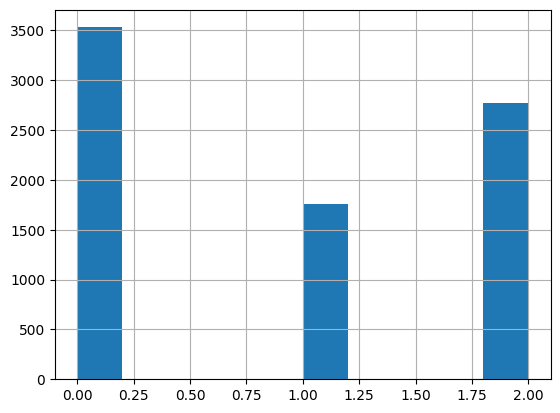

In [12]:
states.hist()

Define a color map for the different states

In [13]:
color_map = {
    0.0: "green",
    1.0: "orange",
    2.0: "red"
}

Concatenate the closing prices and the states, drop missing values,
set state as a hierarchical index, unstack the state index, and plot the closing prices with different colors for each state

In [31]:
# pd.concat([data.Close, states], axis=1).dropna().set_index('state', append=True).SPY.unstack().plot(color=color_map)

<Axes: xlabel='Date'>

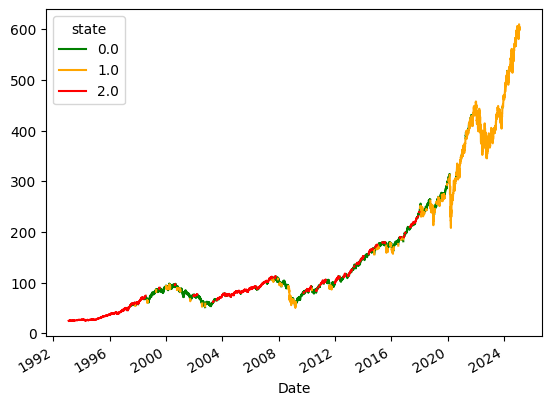

In [32]:
(
    pd.concat([data.Close, states], axis=1)
    .dropna()
    .set_index("state", append=True)
    .SPY
    .unstack("state")
    .plot(color=color_map)
)

<a href="https://pyquantnews.com/">PyQuant News</a> is where finance practitioners level up with Python for quant finance, algorithmic trading, and market data analysis. Looking to get started? Check out the fastest growing, top-selling course to <a href="https://gettingstartedwithpythonforquantfinance.com/">get started with Python for quant finance</a>. For educational purposes. Not investment advise. Use at your own risk.